In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
ddir = r"D:\Dataset\Cleantech Solar"
%matplotlib inline

In [2]:
os.listdir(ddir)

['Assignment_dataset.xlsx', 'Internship_Assignment_final.docx']

In [3]:
df = pd.read_excel(os.path.join(ddir, 'Assignment_dataset.xlsx'))
df.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [4]:
df.set_index('Date', inplace=True)
df

,GHI,PR
Date,,
2019-07-01,3.256608,69.575676
2019-07-02,3.976767,79.314411
2019-07-03,2.811867,61.020006
2019-07-04,3.658408,83.262576
2019-07-05,5.590683,82.124440
...,...,...
2022-03-20,4.226183,81.632738
2022-03-21,3.431675,71.057353
2022-03-22,3.580492,81.631509


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 982 entries, 2019-07-01 to 2022-03-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GHI     982 non-null    float64
 1   PR      982 non-null    float64
dtypes: float64(2)
memory usage: 23.0 KB


In [6]:
df.shape

(982, 2)

In [7]:
df.describe()

,GHI,PR
count,982.000000,982.000000
mean,4.626093,72.648608
std,1.029305,7.292026
min,1.413825,60.023886
25%,4.013435,66.248200
50%,4.740896,72.895357
75%,5.315469,79.031818
max,6.947317,84.980120


In [8]:
df.head()

,GHI,PR
Date,,
2019-07-01,3.256608,69.575676
2019-07-02,3.976767,79.314411
2019-07-03,2.811867,61.020006
2019-07-04,3.658408,83.262576
2019-07-05,5.590683,82.124440


### calculating 30 days moving average of the PR 

In [9]:
# data preparation for red line
df['30-d moving average of the PR'] = df['PR'].rolling(window=30).mean()
df

,GHI,PR,30-d moving average of the PR
Date,,,
2019-07-01,3.256608,69.575676,NaN
2019-07-02,3.976767,79.314411,NaN
2019-07-03,2.811867,61.020006,NaN
2019-07-04,3.658408,83.262576,NaN
2019-07-05,5.590683,82.124440,NaN
...,...,...,...
2022-03-20,4.226183,81.632738,71.181262
2022-03-21,3.431675,71.057353,70.789540
2022-03-22,3.580492,81.631509,71.231840


### calculating year by year budget line ( green line )

In [10]:
df['PR'].resample('Y').mean().values

array([72.93074359, 72.72266184, 72.29289277, 73.19231729])

In [11]:
df.iloc[1,:].name

Timestamp('2019-07-02 00:00:00')

In [12]:
def last_x_day_avg_PR(day, data_frame) : 
    return np.round(df.iloc[-day:,:]['PR'].mean(),1)

In [13]:
df.iloc[-7:,:]

,GHI,PR,30-d moving average of the PR
Date,,,
2022-03-18,4.700167,67.242108,71.559422
2022-03-19,5.915042,63.243977,70.891286
2022-03-20,4.226183,81.632738,71.181262
2022-03-21,3.431675,71.057353,70.789540
2022-03-22,3.580492,81.631509,71.231840
2022-03-23,4.997617,71.906149,71.249772
2022-03-24,5.125050,79.911798,71.855995


In [14]:
last_x_day_avg_PR(7,df.copy())

73.8

In [15]:
import datetime

In [16]:
datetime.datetime(2002,1,1)

datetime.datetime(2002, 1, 1, 0, 0)

## code : the points for the scatter plot are colour coded for GHI [Daily Irradiation] < 2: Navy blue, 2-4: Light blue, 4-6: Orange, >6: Brown

In [17]:
def convert_GHI_to_Cat(x) : 
    if x <= 2 : 
        return '<2'
    elif x > 2 and x <= 4 : 
        return '2-4'
    elif x > 4 and x <= 6 : 
        return '4-6'
    return '>6'

In [18]:
df.tail()

,GHI,PR,30-d moving average of the PR
Date,,,
2022-03-20,4.226183,81.632738,71.181262
2022-03-21,3.431675,71.057353,70.789540
2022-03-22,3.580492,81.631509,71.231840
2022-03-23,4.997617,71.906149,71.249772
2022-03-24,5.125050,79.911798,71.855995


In [19]:
df['GHI'].apply(convert_GHI_to_Cat).tail()

Date
2022-03-20    4-6
2022-03-21    2-4
2022-03-22    2-4
2022-03-23    4-6
2022-03-24    4-6
Name: GHI, dtype: object

In [20]:
df['GHI_color'] = df['GHI'].apply(convert_GHI_to_Cat)

In [21]:
df.tail()

,GHI,PR,30-d moving average of the PR,GHI_color
Date,,,,
2022-03-20,4.226183,81.632738,71.181262,4-6
2022-03-21,3.431675,71.057353,70.789540,2-4
2022-03-22,3.580492,81.631509,71.231840,2-4
2022-03-23,4.997617,71.906149,71.249772,4-6
2022-03-24,5.125050,79.911798,71.855995,4-6


In [22]:
df['GHI_color'].value_counts()

4-6    659
2-4    232
>6      81
<2      10
Name: GHI_color, dtype: int64

### calculatin how many % points above target Budget

In [23]:
pct_abv_tag_bud = 0
for itm in df['PR'].resample('Y').mean().values : 
    pct_abv_tag_bud += df[df['GHI'] > itm].shape[0]
    print(itm, df[df['GHI'] > itm].shape[0])

# pct_abv_tag_bud = ( pct_abv_tag_bud / df.shape[0] ) * 100
print(f"Points above Target Budget PR = {pct_abv_tag_bud} / {df.shape[0]} = {( pct_abv_tag_bud / df.shape[0] ) * 100} %")

72.93074359108695 0
72.72266183695264 0
72.29289277069942 0
73.19231728621016 0
Points above Target Budget PR = 0 / 982 = 0.0 %


### for color set

In [24]:
palette = {
    '<2': 'black',
    '2-4': 'blue',
    '4-6': 'orange',
    '>6': 'brown',
}

Text(0, 0.5, 'Performance Rate [%]')

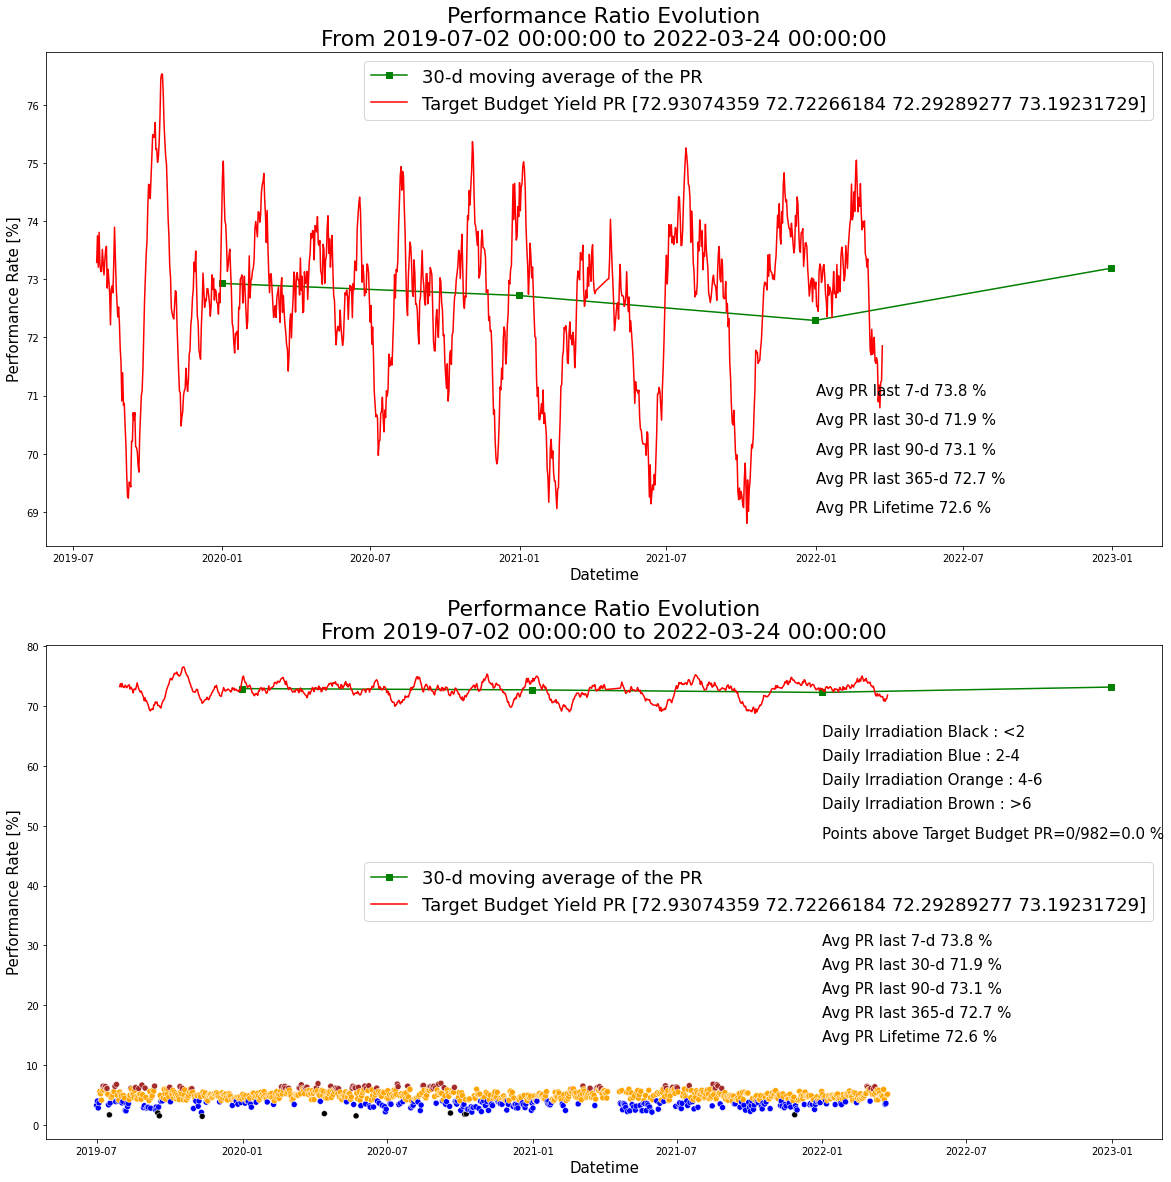

In [25]:
fig, axis = plt.subplots(2,1,figsize = (20,2*10))

# for yearly PR ratio
axis[0].plot(df['PR'].resample('Y').mean(),'s-g')

# for 30-d moving avg PR ratio
axis[0].plot(df['30-d moving average of the PR'], '-r')

# for title
axis[0].set_title(f"Performance Ratio Evolution\nFrom {df.iloc[1,:].name} to {df.iloc[-1,:].name}", fontsize = 22)

# for set legend
axis[0].legend(["30-d moving average of the PR", f"Target Budget Yield PR {df['PR'].resample('Y').mean().values}"],fontsize = 18 )

# for last k-d moving avg PR ratio
axis[0].text(datetime.datetime(2022,1,1), 71, f"Avg PR last 7-d {last_x_day_avg_PR(7,df.copy())} %", fontsize = 15)
axis[0].text(datetime.datetime(2022,1,1), 70.5, f"Avg PR last 30-d {last_x_day_avg_PR(30,df.copy())} %", fontsize = 15)
axis[0].text(datetime.datetime(2022,1,1), 70, f"Avg PR last 90-d {last_x_day_avg_PR(90,df.copy())} %", fontsize = 15)
axis[0].text(datetime.datetime(2022,1,1), 69.5, f"Avg PR last 365-d {last_x_day_avg_PR(365,df.copy())} %", fontsize = 15)
axis[0].text(datetime.datetime(2022,1,1), 69, f"Avg PR Lifetime {np.round(df['PR'].mean(),1)} %", fontsize = 15)

# x_lable name
axis[0].set_xlabel('Datetime', fontsize = 15)

# y_lable name
axis[0].set_ylabel('Performance Rate [%]', fontsize = 15)


# ======================================= code for 2nd graph ===========================================================


# for scatter plot
sns.scatterplot(x = df.index, y = df['GHI'].values, hue = df['GHI_color'], palette = palette, ax = axis[1])

# for yearly PR ratio
axis[1].plot(df['PR'].resample('Y').mean(),'s-g')

# for 30-d moving avg PR ratio
axis[1].plot(df['30-d moving average of the PR'], '-r')

# for title
axis[1].set_title(f"Performance Ratio Evolution\nFrom {df.iloc[1,:].name} to {df.iloc[-1,:].name}", fontsize = 22)

# for set legend
axis[1].legend(["30-d moving average of the PR", f"Target Budget Yield PR {df['PR'].resample('Y').mean().values}"],fontsize = 18 )

# for last k-d moving avg PR ratio
axis[1].text(datetime.datetime(2022,1,1), 30, f"Avg PR last 7-d {last_x_day_avg_PR(7,df.copy())} %", fontsize = 15)
axis[1].text(datetime.datetime(2022,1,1), 26, f"Avg PR last 30-d {last_x_day_avg_PR(30,df.copy())} %", fontsize = 15)
axis[1].text(datetime.datetime(2022,1,1), 22, f"Avg PR last 90-d {last_x_day_avg_PR(90,df.copy())} %", fontsize = 15)
axis[1].text(datetime.datetime(2022,1,1), 18, f"Avg PR last 365-d {last_x_day_avg_PR(365,df.copy())} %", fontsize = 15)
axis[1].text(datetime.datetime(2022,1,1), 14, f"Avg PR Lifetime {np.round(df['PR'].mean(),1)} %", fontsize = 15)

# for GHI scatter plot color info
axis[1].text(datetime.datetime(2022,1,1), 65, f"Daily Irradiation Black : <2", fontsize = 15)
axis[1].text(datetime.datetime(2022,1,1), 61, f"Daily Irradiation Blue : 2-4", fontsize = 15)
axis[1].text(datetime.datetime(2022,1,1), 57, f"Daily Irradiation Orange : 4-6", fontsize = 15)
axis[1].text(datetime.datetime(2022,1,1), 53, f"Daily Irradiation Brown : >6", fontsize = 15)

# calculatin how many % points above target Budget
axis[1].text(datetime.datetime(2022,1,1), 48, f"Points above Target Budget PR={pct_abv_tag_bud}/{df.shape[0]}={( pct_abv_tag_bud / df.shape[0] ) * 100} %", fontsize = 15)


# x_lable name
axis[1].set_xlabel('Datetime', fontsize = 15)

# y_lable name
axis[1].set_ylabel('Performance Rate [%]', fontsize = 15)